## Model
In this notebook I've written out the most basic version of the network from today's task. Try running the entire thing and seeing the network train then try to make some changes yourself.

In [13]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.optimizers import SGD
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import np_utils

from keras.datasets import mnist

In [14]:
# Data parameters
height, width, depth = 28, 28, 1
classes = 10
input_shape = (height,width,depth)

In [15]:
# Load Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data

X_train = X_train.reshape(X_train.shape[0], height, width, depth)
X_test = X_test.reshape(X_test.shape[0], height, width, depth)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, classes) # One-hot encode the labels

In [16]:
# Model parameters
hiddens = 128
batch_size = 128
epochs = 20

In [17]:
# Model architecture -- this is where you will make changes to the structure of the network itself
inp = Input(shape=input_shape, name='Input')
flat = Flatten(name = 'Flatten_input')(inp)
hidden_1 = Dense(hiddens, activation='sigmoid', name='Hidden_layer_1')(flat)
# perhaps you could add a layer here?
hidden_2 = Dense(hiddens, activation='sigmoid', name='Hidden_layer_2')(hidden_1)
out = Dense(classes, activation='softmax', name='Output_layer')(hidden_2)
model = Model(inputs=inp, outputs=out)

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
Flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
Hidden_layer_1 (Dense)       (None, 128)               100480    
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 128)               16512     
_________________________________________________________________
Output_layer (Dense)         (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


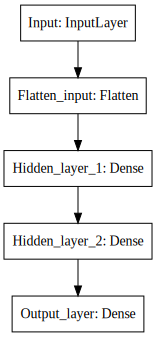

In [19]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [20]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(),
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_split=0.1)

score = model.evaluate(X_test, Y_test, verbose=1)

print("Accuracy:", score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 30us/step - loss: 2.2834 - acc: 0.1713 - val_loss: 2.2573 - val_acc: 0.1550
Epoch 2/20
53888/54000 [============================>.] - ETA: 0s - loss: 2.2342 - acc: 0.2988- ETA: 0s - loss: 2.2440 - 

KeyboardInterrupt: 